# Lab 2 Report
Submitted By:
Sandesh Poudel

Roll No:
171238(morning)

In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

# Contents of lab 2:
- Low pass filter:
  
  In order to remove high spatial frequency noise from a digital image, low pass filtering (also known as smoothing) is used. Low-pass filters usually use a moving window operator that affects one pixel of the image at a time, modifying its value with some local pixel area (window) functionality. To impact all the pixels in the image, the operator moves over the image.

  **Algorithm of Low pass filter:**
  
  Step 1:
    
    Input the path of image and 3*3 filter.
  
  Step 2:

    Apply the zero padding on the image.
  
  Step 3:

    Calculate y as

    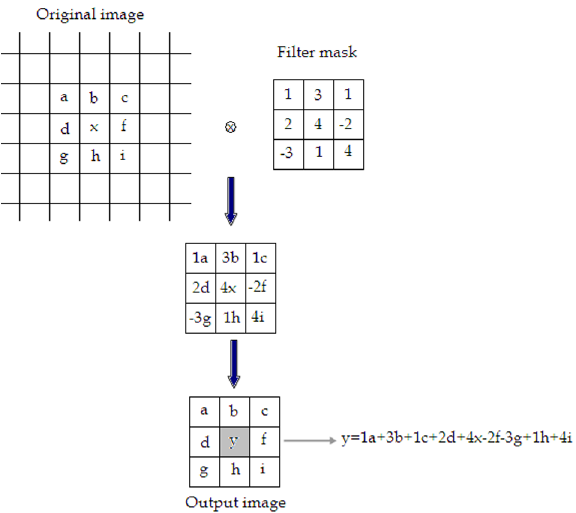
    
    Step 4:

    Repeat step 3 for each pixel in image.


In [2]:
def input_image(): # Function to get path of image to be filtered.
  path = input("Enter path of the image.") # Read image path.
  grey_img = cv2.imread(path, 0) # Convert image to grayscale.
  return grey_img # Return image after converting to grayscale.

def input_filter(): # Function to get 3*3 filter.
  print("Enter 3*3 filter.") # Display message.
  filter = [] # To store 3*3 filter.
  for i in range(3):
    filter.append([int(i) for i in input().split()]) # Getting 3*3 filter.
  filter_arr = np.array(filter) # Converting list to numpy array.
  return filter_arr # Return 3*3 filter array.

def zero_padding(img): # Function to add zeros to the image.
  m,n = img.shape # Get shape of the image.
  zero_arr = np.zeros((m+2, n+2)) # Create array of m+2, n+2 and initialize it with zero.
  for i in range(1,m+1):
    for j in range(1,n+1):
      zero_arr[i][j] = img[i-1][j-1] # Add image to zero initialized array.
  return zero_arr,m,n

def lpf(zero_padded_img,m,n,filter): # Function to perform low pass filter.
  low_pass_filter = zero_padded_img.copy() # Create copy of zero padded image.
  for i in range(1, m+1):
    for j in range(1, n+1):
      # Applying low pass filter function.
      low_pass_filter[i][j] = round(1/(filter.sum())*(zero_padded_img[i-1][j-1]*filter[0][0]+zero_padded_img[i][j-1]*filter[0][1]+zero_padded_img[i+1][j-1]*filter[0][2]+zero_padded_img[i-1][j]*filter[1][0]+zero_padded_img[i][j]*filter[1][1]+zero_padded_img[i+1][j]*filter[1][2]+zero_padded_img[i-1][j+1]*filter[2][0]+zero_padded_img[i][j+1]*filter[2][1]+zero_padded_img[i+1][j+1]*filter[2][2]))
  return low_pass_filter



Enter path of the image.aaa.jpeg
Enter 3*3 filter.
1 1 1 
1 0 1
1 1 1


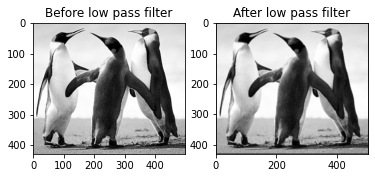

In [5]:
img = input_image() # Getting image.
filter = input_filter() # Getting filter.
zero_padded_img,m,n = zero_padding(img) # Zero padding the image.
# Displaying image before and after low pass filter.
plt.subplot(1,2,1)
plt.imshow(img, cmap="gray")
plt.title("Before low pass filter")
lpf_img = lpf(zero_padded_img,m,n,filter)
plt.subplot(1,2,2)
plt.imshow(lpf_img, cmap="gray")
plt.title("After low pass filter")
plt.show()

- High pass filter:

  You can use high-pass filters to sharpen an image. Fine information in the picture is highlighted by this filter — the opposite of the low-pass filter. High-pass Filtering operates the same way as filtering low-pass; it just uses another convolution kernel. When filtering an image, each pixel is affected by its neighbors, and the net effect of filtering is moving information around the image.

  **Algorithm of Low pass filter:**
  
  Step 1:
    
  Input the path of image and 3*3 filter.
  
  Step 2:

  Apply the zero padding on the image.
  
  Step 3:

  Calculate y as

  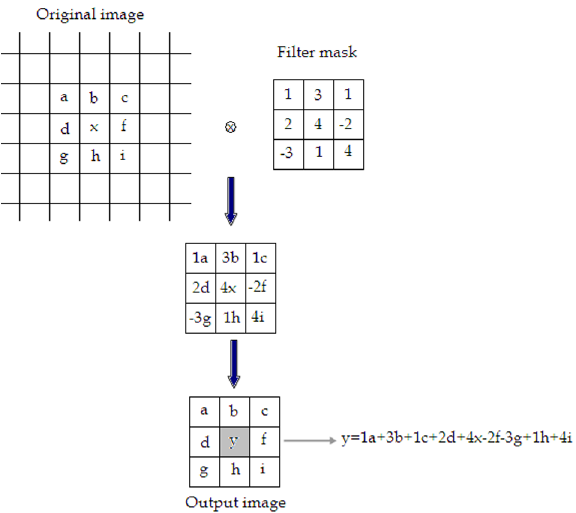
    
  Step 4:

  Repeat step 3 for each pixel in image.

In [6]:
def high_pass(zero_padded_img,m,n,filter): # Function to apply high pass filter.
    high_pass_filter = zero_padded_img.copy() # Create copy of zero padded image.
    for i in range(1, m + 1):
        for j in range(1, n + 1):
          # Applying high pass filter function.
            high_pass_filter[i][j] = round(1 / 9 * (
                        zero_padded_img[i - 1][j - 1] * filter[0][0] + zero_padded_img[i][j - 1] * filter[0][1] +
                        zero_padded_img[i + 1][j - 1] * filter[0][2] + zero_padded_img[i - 1][j] * filter[1][0] +
                        zero_padded_img[i][j] * filter[1][1] + zero_padded_img[i + 1][j] * filter[1][2] +
                        zero_padded_img[i - 1][j + 1] * filter[2][0] + zero_padded_img[i][j + 1] * filter[2][1] +
                        zero_padded_img[i + 1][j + 1] * filter[2][2]))
    return high_pass_filter

Enter path of the image.aaa.jpeg
Enter 3*3 filter.
-1 -1 -1
-1 0 -1 
-1 -1 -1


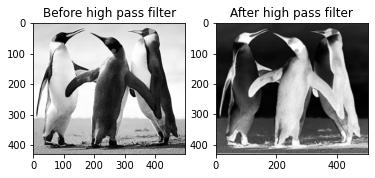

In [8]:
img = input_image() # Getting image.
filter = input_filter() # Getting filter.
zero_padded_img,m,n = zero_padding(img) # Zero padding the image.
# Displaying image before and after high pass filter.
plt.subplot(1,2,1)
plt.imshow(img, cmap="gray")
plt.title("Before high pass filter")
hpf_img = high_pass(zero_padded_img,m,n,filter)
plt.subplot(1,2,2)
plt.imshow(hpf_img, cmap="gray")
plt.title("After high pass filter")
plt.show()


- Median pass filter:

  It is also known as nonlinear filtering. It is used to eliminate salt and pepper noise. Here the pixel value is replaced by the median value of the neighboring pixel. 

  **Algorithm for median filter:**

  Step 1:

    Input the path of image

  Step 2:
    
    Apply the zero padding to the image.

  Step 3:

    Use the window size of 3*3.
  
  Step 4:

    Calculate y as:
    y = median of 3*3 window.
  
  Step 5:
    
    Repeat step 4 for each pixel of image.

In [9]:
def mpf(zero_padded_img,m,n): # Function to apply median pass filter.
    median_filter = zero_padded_img.copy() # Creating copy of zero padded image.
    for i in range(1, m + 1):
        for j in range(1, n + 1):
          # Creating list of 3*3 window pixels.
            req_list = [[zero_padded_img[i - 1][j - 1], zero_padded_img[i][j - 1], zero_padded_img[i + 1][j - 1]],
                        [zero_padded_img[i - 1][j], zero_padded_img[i][j], zero_padded_img[i + 1][j]],
                        [zero_padded_img[i - 1][j + 1], zero_padded_img[i][j + 1], zero_padded_img[i + 1][j + 1]]]
            required_arr = np.array(req_list) # Converting list to numpy array.
            median_filter[i][j] = np.median(required_arr) # Finding the median.
    return median_filter

Enter path of the image.aaa.jpeg


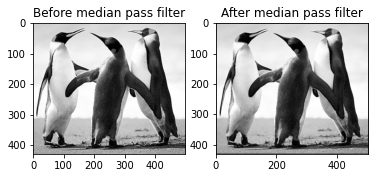

In [10]:
img = input_image() # Getting image.
zero_padded_img, m, n = zero_padding(img) # Zero padding the image.
# Displaying image before and after median pass filter.
plt.subplot(1, 2, 1)
plt.imshow(img, cmap="gray")
plt.title("Before median pass filter")
mpf_img = mpf(zero_padded_img, m, n)
plt.subplot(1, 2, 2)
plt.imshow(mpf_img, cmap="gray")
plt.title("After median pass filter")
plt.show()

 ## Conculsion

  In this lab, we learned about low pass filter, high pass filter and median filter